<a href="https://colab.research.google.com/github/yunianita/textclassification/blob/main/LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

Pada section ini mengambil library yang dibutuhkan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re #5
import numpy as np
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from gensim import corpora
from gensim import models
from sklearn.decomposition import LatentDirichletAllocation
!pip install nlp-id

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

# Init Data

Section ini bertujuan untuk mengambil dataset

In [ ]:
# old
#https://docs.google.com/spreadsheets/d/1tGJvXQNtf_YiRBj3BVcmkkywNuFdIVljeZsXBsghoi4/edit?usp=sharing

# new
# https://docs.google.com/spreadsheets/d/1fzDu9lrPNwhNff_JMseb05UJGprn0BGPKD3Y82nqLms/edit?usp=sharing
from io import BytesIO

import requests
import pandas as pd

# r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1tGJvXQNtf_YiRBj3BVcmkkywNuFdIVljeZsXBsghoi4&output=xlsx')
#r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1fzDu9lrPNwhNff_JMseb05UJGprn0BGPKD3Y82nqLms&output=xlsx')
#input satu data
#r = requests.get('https://docs.google.com/spreadsheets/d/1uGUfHg9OrEgVGUddWQ68lXVat-Pt3mLqduWy36HZJJM/export')
#input dua data
#r = requests.get('https://docs.google.com/spreadsheets/d/1UWjjKNByxQWiw-1TW8wLupbclGDCcQMHJjQbMYzo26I/export?format=xlsx')
#input tiga data
#r = requests.get('https://docs.google.com/spreadsheets/d/1vGhJ__OHYsRFKqeJt9ceO3CFGCBG8PItfQ9Q-p-gjlY/export?format=xlsx')
#input 300 data
#r = requests.get('https://docs.google.com/spreadsheets/d/10qxK8VzXq8MzwjO3z64a0F60B0fL_IhheGjaHXrb7O0/export?format=xlsx')
#input data MODIF1
r = requests.get('https://docs.google.com/spreadsheets/d/1PBpiuWTGI4cgejGEzH2u1R9LMO4-EkoGdYUCfKCJlqw/export?format=xlsx')
#input data MODIF CAMPUR
#r = requests.get('https://docs.google.com/spreadsheets/d/1kWQzO7gEs_QBfZtVG-C44ITyzHO7E0gGrlQcKIie0w8/export?format=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Sheet1', dtype=str, index_col=None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset 

,no,title,question,answer,topic_set,answer_labeled,labeled
0,0.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Halo yayan, Terima kasih atas pertanyaannya.",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F1
1,1.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Berdasarkan riwayat keluhan istri Anda yang su...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F2
2,2.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Gejala muntah dan diare pada dasarnya merupaka...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F3
3,3.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Kondisi ini dapat membaik dengan sendirinya da...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F4
4,4.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Pantau terus gejala yang muncul, kembalikan ca...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F5
5,5.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Selain itu, berikut anjuran yang dapat dilakuk...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F6
6,6.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Minum air, sup, atau minuman elektrolit untuk ...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F7
7,7.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Ketika makan nanti, makan sedikit - sedikit de...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F8
8,8.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Istirahat yang cukup.,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F9
9,9.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Menghindari susu dan produk susu, kopi, minuma...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F10


# Input Data dan PreProcessing dengan txt : Uji Cobaku 1

In [ ]:
#dataset['answer'][0].split('.')

In [ ]:
#Nyoba Program
from pathlib import Path
filepath = Path("/content/drive/MyDrive/Data1.txt")
original_text = filepath.read_text().split(".")
print(f"There are {len(original_text)} sentences")
f = open(filepath,"r")
kalimat = f.read()
print(kalimat)

There are 14 sentences
Halo yayan, Terima kasih atas pertanyaannya. 
Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. 
Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. 
Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. 
Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan rasa sangat haus, dan adanya tanda - tanda  kebingu

In [ ]:
#Case Folding
kalimat=kalimat.lower()
print(kalimat)

halo yayan, terima kasih atas pertanyaannya. 
berdasarkan riwayat keluhan istri anda yang sudah anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang anda sebutkan tersebut. 
gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. 
kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. 
pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan rasa sangat haus, dan adanya tanda - tanda  kebingungan. 
selain itu, beri

In [ ]:
# remove punctuation, number
import re # impor modul regular expression
import string

#Menghapus angka
kalimat = re.sub(r"\d+", "", kalimat)

#Menghapus tanda baca
kalimat = kalimat.translate(str.maketrans("","",string.punctuation))

#Menghapus whitepace (karakter kosong)
kalimat = kalimat.strip()
print(kalimat)

halo yayan terima kasih atas pertanyaannya 
berdasarkan riwayat keluhan istri anda yang sudah anda sampaikan yaitu muntah  muntah dan diare lebih dari x  terdapat kemungkinan kondisi yang dialami oleh istri anda salah satunya adalah keracunan makanan infeksi saluran cerna adanya malapsorbsi  intoleransi makanan yang ditandai dengan gejala  gejala yang anda sebutkan tersebut 
gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin  racun dari makanan  minuman yang terkontaminasi yang dikonsumsi sebelumnya 
kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter 
pantau terus gejala yang muncul kembalikan cairan tubuh yang keluar dan monitor tanda  tanda  dehidrasi seperti lemas mata cowong tidak buang air kecil lebih dari  jam atau urin berwarna pekat mulut kering dan rasa sangat haus dan adanya tanda  tanda  kebingungan 
selain itu berikut anjuran yang dapat dilakuk

In [ ]:
#Hasil dari filter ini yaitu satu baris jadi jika dimasukkan ke proses segmentasi hasilnya dokumen terlalu sedikit
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
 
tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))
 
removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)
 
print(removed)

kal=''
for kata in removed:
  kal+=kata+' '
print(kal)

['halo', 'yayan', 'terima', 'kasih', 'pertanyaannya', 'berdasarkan', 'riwayat', 'keluhan', 'istri', 'muntah', 'muntah', 'diare', 'x', 'kondisi', 'dialami', 'istri', 'salah', 'satunya', 'keracunan', 'makanan', 'infeksi', 'saluran', 'cerna', 'malapsorbsi', 'intoleransi', 'makanan', 'ditandai', 'gejala', 'gejala', 'sebutkan', 'gejala', 'muntah', 'diare', 'dasarnya', 'respon', 'tubuh', 'wajar', 'tubuh', 'berusaha', 'mengeluarkan', 'toksin', 'racun', 'makanan', 'minuman', 'terkontaminasi', 'dikonsumsi', 'kondisi', 'membaik', 'hitungan', 'pengobatan', 'khusus', 'dokter', 'pantau', 'gejala', 'muncul', 'kembalikan', 'cairan', 'tubuh', 'monitor', 'tanda', 'tanda', 'dehidrasi', 'lemas', 'mata', 'cowong', 'buang', 'air', 'jam', 'urin', 'berwarna', 'pekat', 'mulut', 'kering', 'haus', 'tanda', 'tanda', 'kebingungan', 'anjuran', 'mengurangi', 'keluhan', 'menghindari', 'makan', 'jam', 'minum', 'air', 'sup', 'minuman', 'elektrolit', 'membantu', 'mengembalikan', 'cairan', 'tubuh', 'istri', 'makan', 'ma

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
hasil = stemmer.stem(kal)
print(hasil)

halo yayan terima kasih tanya dasar riwayat keluh istri muntah muntah diare x kondisi alami istri salah satu racun makan infeksi salur cerna malapsorbsi intoleransi makan tanda gejala gejala sebut gejala muntah diare dasar respon tubuh wajar tubuh usaha keluar toksin racun makan minum kontaminasi konsumsi kondisi baik hitung obat khusus dokter pantau gejala muncul kembali cair tubuh monitor tanda tanda dehidrasi lemas mata cowong buang air jam urin warna pekat mulut kering haus tanda tanda bingung anjur kurang keluh hindar makan jam minum air sup minum elektrolit bantu kembali cair tubuh istri makan makan makan tawar roti roti nasi bubur biskuit istirahat hindar susu produk susu kopi minum soda makan asam pedas lemak gejala baik muntah diare darah dalam demam lemas langsung hubung tugas fasilitas layan sehat dekat moga informasi bantu moga lekas sembuh salam


# Preprocessing

In [ ]:
#Section ini untuk proses Preprocessing

In [ ]:
# casefolding
#from nltk import tokenize
#sentences= tokenize.sent_tokenize(dataset['answer'][0].lower())
#dataset['req_lower'] = sentences
#dataset['req_lower'] = dataset['answer'].str.lower()
# casefolding
dataset['req_lower']= dataset['answer'].str.lower()

In [ ]:
# remove punctuation, number
#dataset['req_punct'] = dataset['req_lower'].str.replace(r'[^\w\s]+', '')
#import numpy as np

#sent_punct=[item.replace(r'[^\w\s]+', '') for item in sentences]
#myarray = np.array(sent_punct)
#import re
#def rem_number(sentence):
  #sentence=str(sentence)
  #rem_num = re.sub('[0-9]+', '', sentence)
  #return rem_num

#dataset['req_punct'] = dataset['req_punct'].apply(rem_number)
#sent_punct2=[item.apply(rem_number) for item in sent_punct] 
# remove punctuation, number
dataset['req_punct'] = dataset['req_lower'].str.replace(r'[^\w\s]+', '')

import re
def rem_number(sentence):
  sentence=str(sentence)
  rem_num = re.sub('[0-9]+', '', sentence)
  return rem_num

dataset['req_punct'] = dataset['req_punct'].apply(rem_number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


In [ ]:
from nlp_id.lemmatizer import Lemmatizer 
lemmatizer = Lemmatizer() 
dataset['lemma'] = dataset['req_punct'].apply(lambda x: [lemmatizer.lemmatize(x)])

In [ ]:
def convert_list_to_string(sentence):
  str1 = ' '.join(sentence)
  return str1

dataset['lemma'] = dataset['lemma'].apply(convert_list_to_string)

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
words = stopwords.words("indonesian")
dataset['stopwords'] = dataset['lemma'].apply(lambda x: [item for item in x.split() if item not in words])
dataset['stopwords']= dataset['stopwords'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [ ]:
dataset['req_stopwords'] = dataset['req_punct'].apply(lambda x: [item for item in x.split()])

In [ ]:
dataset

,no,title,question,answer,topic_set,answer_labeled,labeled,req_lower,req_punct,lemma,stopwords,req_stopwords
0,0.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Halo yayan, Terima kasih atas pertanyaannya.",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F1,"halo yayan, terima kasih atas pertanyaannya.",halo yayan terima kasih atas pertanyaannya,halo yayan terima kasih atas tanya,halo yayan terima kasih,"[halo, yayan, terima, kasih, atas, pertanyaannya]"
1,1.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Berdasarkan riwayat keluhan istri Anda yang su...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F2,berdasarkan riwayat keluhan istri anda yang su...,berdasarkan riwayat keluhan istri anda yang su...,dasar riwayat keluh istri anda yang sudah anda...,dasar riwayat keluh istri muntah muntah diare ...,"[berdasarkan, riwayat, keluhan, istri, anda, y..."
2,2.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Gejala muntah dan diare pada dasarnya merupaka...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F3,gejala muntah dan diare pada dasarnya merupaka...,gejala muntah dan diare pada dasarnya merupaka...,gejala muntah dan diare pada dasar rupa respon...,gejala muntah diare dasar rupa respon tubuh wa...,"[gejala, muntah, dan, diare, pada, dasarnya, m..."
3,3.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...",Kondisi ini dapat membaik dengan sendirinya da...,gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F4,kondisi ini dapat membaik dengan sendirinya da...,kondisi ini dapat membaik dengan sendirinya da...,kondisi ini dapat baik dengan sendiri dalam hi...,kondisi hitung obat khusus dokter,"[kondisi, ini, dapat, membaik, dengan, sendiri..."
4,4.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Pantau terus gejala yang muncul, kembalikan ca...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F5,"pantau terus gejala yang muncul, kembalikan ca...",pantau terus gejala yang muncul kembalikan cai...,pantau terus gejala yang muncul kembali cair t...,pantau gejala muncul cair tubuh monitor tanda ...,"[pantau, terus, gejala, yang, muncul, kembalik..."
5,5.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Selain itu, berikut anjuran yang dapat dilakuk...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F6,"selain itu, berikut anjuran yang dapat dilakuk...",selain itu berikut anjuran yang dapat dilakuka...,selain itu ikut anjur yang dapat laku untuk ku...,anjur laku keluh hindar makan jam,"[selain, itu, berikut, anjuran, yang, dapat, d..."
6,6.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Minum air, sup, atau minuman elektrolit untuk ...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F7,"minum air, sup, atau minuman elektrolit untuk ...",minum air sup atau minuman elektrolit untuk me...,minum air sup atau minum elektrolit untuk bant...,minum air sup minum elektrolit bantu cair tubu...,"[minum, air, sup, atau, minuman, elektrolit, u..."
7,7.0,Mual disertai pusing dan mencret setelah makan...,"halo dok selamat malam, kemarin jam 18.15 saya...","Ketika makan nanti, makan sedikit - sedikit de...",gangguan-pencernaan,"Alo yayan, Terima kasih atas pertanyaannya. [F...",F1 F3 F4 F3 F5 F8,"ketika makan nanti, makan sedikit - sedikit de...",ketika makan nanti makan sedikit sedikit deng...,ketika makan nanti makan sedikit sedikit denga...,makan makan makan tawar roti roti nasi bubur b...,"[ketika, maka

# LSA GENSIM

# TFIDF

Membuat TF IDF menggunakan dataset yang telah di preprocessing

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(dataset['req_stopwords'])
corpus = [dictionary.doc2bow(text) for text in dataset['req_stopwords']]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [ ]:
corpus_tfidf = tfidf[corpus]

## LSA

Proses LSA Gensim

In [ ]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=6)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf] 

Menampilkan 10 kata teratas di setiap topik

In [ ]:
lsi_model.print_topics(6)

[(0,
  '0.201*"menstruasi" + 0.143*"kehamilan" + 0.121*"haid" + 0.115*"bayi" + 0.102*"obat" + 0.095*"hari" + 0.094*"siklus" + 0.092*"lambung" + 0.084*"nyeri" + 0.084*"tanda"'),
 (1,
  '0.298*"menstruasi" + -0.251*"bayi" + 0.206*"haid" + 0.179*"kehamilan" + -0.177*"batuk" + -0.173*"lambung" + -0.156*"paru" + 0.148*"siklus" + -0.130*"obat" + 0.123*"testpack"'),
 (2,
  '-0.703*"bayi" + -0.201*"asi" + -0.190*"anak" + 0.168*"lambung" + 0.114*"asam" + -0.106*"menyusu" + 0.093*"paru" + 0.091*"kemih" + 0.084*"batuk" + -0.079*"beri"'),
 (3,
  '-0.402*"kemih" + -0.218*"bak" + 0.218*"lambung" + -0.169*"saluran" + 0.161*"asam" + 0.155*"batuk" + -0.150*"buang" + -0.135*"infeksi" + 0.133*"haid" + 0.133*"paru"'),
 (4,
  '0.362*"paru" + 0.347*"batuk" + -0.279*"lambung" + 0.185*"dahak" + -0.155*"asam" + -0.146*"obat" + 0.145*"tuberkulosis" + 0.133*"tes" + 0.126*"tbc" + 0.114*"nafas"'),
 (5,
  '-0.309*"kb" + 0.236*"kehamilan" + -0.221*"â" + 0.216*"testpack" + 0.179*"tanda" + -0.177*"iud" + -0.177*"sunti

In [ ]:
lsi_model.show_topics()

[(0,
  '0.201*"menstruasi" + 0.143*"kehamilan" + 0.121*"haid" + 0.115*"bayi" + 0.102*"obat" + 0.095*"hari" + 0.094*"siklus" + 0.092*"lambung" + 0.084*"nyeri" + 0.084*"tanda"'),
 (1,
  '0.298*"menstruasi" + -0.251*"bayi" + 0.206*"haid" + 0.179*"kehamilan" + -0.177*"batuk" + -0.173*"lambung" + -0.156*"paru" + 0.148*"siklus" + -0.130*"obat" + 0.123*"testpack"'),
 (2,
  '-0.703*"bayi" + -0.201*"asi" + -0.190*"anak" + 0.168*"lambung" + 0.114*"asam" + -0.106*"menyusu" + 0.093*"paru" + 0.091*"kemih" + 0.084*"batuk" + -0.079*"beri"'),
 (3,
  '-0.402*"kemih" + -0.218*"bak" + 0.218*"lambung" + -0.169*"saluran" + 0.161*"asam" + 0.155*"batuk" + -0.150*"buang" + -0.135*"infeksi" + 0.133*"haid" + 0.133*"paru"'),
 (4,
  '0.362*"paru" + 0.347*"batuk" + -0.279*"lambung" + 0.185*"dahak" + -0.155*"asam" + -0.146*"obat" + 0.145*"tuberkulosis" + 0.133*"tes" + 0.126*"tbc" + 0.114*"nafas"'),
 (5,
  '-0.309*"kb" + 0.236*"kehamilan" + -0.221*"â" + 0.216*"testpack" + 0.179*"tanda" + -0.177*"iud" + -0.177*"sunti

In [ ]:
for i,l in enumerate(corpus_lsi):
  print('Doc #',i+1)
  for a in l:
    print('Topic',a[0],':',a[1])
  print('')

Doc # 1
Topic 0 : 0.23500910587717014
Topic 1 : -0.1018393847859983
Topic 2 : 0.009417011486239859
Topic 3 : -0.010744617222452315
Topic 4 : -0.0735949064372703
Topic 5 : 0.06029318367626857

Doc # 2
Topic 0 : 0.3343054027803443
Topic 1 : 0.2117486457416118
Topic 2 : 0.004130328602723389
Topic 3 : 0.07728685916737904
Topic 4 : 0.018827034532973057
Topic 5 : -0.07553667851019216

Doc # 3
Topic 0 : 0.11967589451669158
Topic 1 : -0.05240761548773779
Topic 2 : 0.014702287518830237
Topic 3 : 0.012631045014580759
Topic 4 : -0.036326125728961545
Topic 5 : -0.06307392460120011

Doc # 4
Topic 0 : 0.21660608528716457
Topic 1 : -0.08294365211360005
Topic 2 : 0.04246164164956374
Topic 3 : 0.023702680924300487
Topic 4 : -0.09479463218784932
Topic 5 : 0.01415168679639329

Doc # 5
Topic 0 : 0.27812450195431915
Topic 1 : -0.17185772649338696
Topic 2 : 0.1392064094961602
Topic 3 : 0.11378868169794337
Topic 4 : -0.20350983600100694
Topic 5 : 0.11790880515874984

Doc # 6
Topic 0 : 0.2020193665601587
Topi

# LSA SKLEARN

## TFIDF

In [ ]:
vect =TfidfVectorizer()
vect_text=vect.fit_transform(dataset['stopwords'])
idf=vect.idf_

## LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

Menampilkan probabilitas tiap topik pada dokumen

In [ ]:
for j in range(len(dataset)):
  l=lsa_top[j]
  print("Document",j+1)
  for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)
  print('================')

In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
      print(t)
        # print(t[0],end=" ")
    print("\n")

# LDA Gensim

## Source : https://www.analyticsvidhya.com/blog/2021/06/part-3-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/

## TF IDF

In [ ]:
dict_ = corpora.Dictionary(dataset['req_stopwords'])

In [ ]:
corpus = [dict_.doc2bow(text) for text in dataset['req_stopwords']]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [ ]:
corpus_tfidf = tfidf[corpus]

## LDA

In [ ]:
Lda = models.ldamodel.LdaModel

In [ ]:
ldamodel = Lda(corpus_tfidf,num_topics=6,id2word=dict_,passes=1,random_state=0,eval_every=None)

In [ ]:
ldamodel.print_topics()

In [ ]:
count = 0
for i in ldamodel[corpus_tfidf]:
  print('Doc',count,i)
  count+=1

# LDA SKLEARN

## TFIDF

In [ ]:
vect =TfidfVectorizer()
vect_text=vect.fit_transform(dataset['stopwords'])
idf=vect.idf_

In [ ]:
vocab_tf_idf = vect.get_feature_names()
vocab_tf_idf

## LDA

In [ ]:
lda_model = LatentDirichletAllocation(n_components=6, max_iter=20, random_state=0,doc_topic_prior=0.1,topic_word_prior=0.1)
X_topics = lda_model.fit_transform(vect_text)

topic_words = lda_model.components_

In [ ]:
n_top_words = 10
for i, topic_dist in enumerate(topic_words):
  sorted_topic_dist = np.argsort(topic_dist)

  topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]

  topic_words = topic_words[:-n_top_words:-1]
  print('Topic',str(i+1),topic_words)

In [ ]:
doc_topic = lda_model.transform(vect_text)

for n in range(len(dataset)):
  topic_doc = doc_topic[n].argmax()

  print('document',n+1,"-- Topic:",topic_doc,'-- Prob:',doc_topic[n])

# PLSA

Source : https://github.com/yedivanseven/PLSA/blob/master/notebooks/Examples.ipynb

In [ ]:
!pip install plsa

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/foo.csv', 'w') as f:
  dataset.to_csv(f)

In [ ]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

In [ ]:
csv_file = '/gdrive/My Drive/foo.csv'

In [ ]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

In [ ]:
corpus = Corpus.from_csv(csv_file, pipeline,col=4)
corpus

In [ ]:
n_topics = 6

In [ ]:
plsa = PLSA(corpus, n_topics, True)
plsa

In [ ]:
result = plsa.fit()
plsa

In [ ]:
visualize = Visualize(result)
visualize

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)


In [ ]:
for i in range(len(dataset)):
  fig, ax = plt.subplots()
  _ = visualize.topics_in_doc(i, ax)
  fig.tight_layout()

# Embedded Topic Model

In [ ]:
!pip install -U embedded_topic_model

     |████████████████████████████████| 6.8 MB 6.3 MB/s 
     |████████████████████████████████| 24.2 MB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 26.6 MB/s 
     |████████████████████████████████| 14.8 MB 35.5 MB/s 
     |████████████████████████████████| 748.8 MB 17 kB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434692 sha256=0b1694339e0337ee7812c7e7b80b48da053dbb92f0ba2d60423d1dec7a41c90b
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+

In [ ]:
documents = [dataset['stopwords'][i] for i,data in enumerate(dataset)]

In [ ]:
from embedded_topic_model.utils import preprocessing
# Preprocessing the dataset
vocabulary, train_dataset, _, = preprocessing.create_etm_datasets(
    documents, 
    min_df=0.01, 
    max_df=0.75, 
    train_size=0.85, 
)

In [ ]:
from embedded_topic_model.utils import embedding

# Training word2vec embeddings
embeddings_mapping = embedding.create_word2vec_embedding_from_dataset(documents)

In [ ]:
from embedded_topic_model.models.etm import ETM

# Training an ETM instance
etm_instance = ETM(
    vocabulary,
    embeddings=embeddings_mapping, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
    num_topics=6,
    epochs=300,
    debug_mode=True,
    train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                            # topic embeddings. By default, is False. If 'embeddings' argument
                            # is being passed, this argument must not be True
)

etm_instance.fit(train_dataset)

Topics before training: [['tekan', 'tengkorak', 'tingkat', 'kebal', 'kepala', 'tubuh', 'mual', 'sistem', 'muntah', 'obat'], ['haid', 'interval', 'volume', 'darah', 'sel', 'tengkorak', 'bentuk', 'durasi', 'telur', 'tingkat'], ['periksa', 'spesialis', 'usg', 'saran', 'kandung', 'bidan', 'fisik', 'medis', 'tangan', 'anamnesis'], ['asam', 'makan', 'asma', 'obat', 'valproat', 'hindar', 'kambuh', 'masuk', 'hasil', 'pedas'], ['telur', 'hamil', 'sel', 'hitung', 'rahim', 'tanggal', 'usia', 'nikah', 'november', 'hpmt'], ['asma', 'nyeri', 'obat', 'kandung', 'hati', 'spesialis', 'samping', 'reda', 'kambuh', 'salah']]
Epoch 1 - Learning Rate: 0.005 - KL theta: 0.0 - Rec loss: 650.66 - NELBO: 650.66
Epoch 2 - Learning Rate: 0.005 - KL theta: 0.05 - Rec loss: 650.59 - NELBO: 650.64
Epoch 3 - Learning Rate: 0.005 - KL theta: 0.01 - Rec loss: 650.55 - NELBO: 650.56
Epoch 4 - Learning Rate: 0.005 - KL theta: 0.02 - Rec loss: 650.26 - NELBO: 650.28
Epoch 5 - Learning Rate: 0.005 - KL theta: 0.02 - Rec lo

In [ ]:
topics = etm_instance.get_topics(10)
topic_coherence = etm_instance.get_topic_coherence()
topic_diversity = etm_instance.get_topic_diversity()

In [ ]:
for i,topic in enumerate(topics):
  print('Topik',i+1)
  print(topic)
  print('')

Topik 1
['makan', 'obat', 'asam', 'konsumsi', 'asma', 'nyeri', 'hindar', 'lambung', 'muntah', 'milik']

Topik 2
['tengkorak', 'tekan', 'tingkat', 'listrik', 'kepala', 'aktivitas', 'periksa', 'otak', 'sakit', 'darah']

Topik 3
['periksa', 'spesialis', 'kandung', 'usg', 'listrik', 'bidan', 'medis', 'aktivitas', 'fisik', 'laku']

Topik 4
['tengkorak', 'tekan', 'obat', 'kepala', 'sakit', 'muntah', 'periksa', 'asma', 'kandung', 'mual']

Topik 5
['hamil', 'minggu', 'tanggal', 'november', 'nikah', 'hpmt', 'hpl', 'usia', 'hitung', 'contoh']

Topik 6
['haid', 'periksa', 'sel', 'darah', 'telur', 'bentuk', 'interval', 'menstruasi', 'langsung', 'rahim']



In [ ]:
topic_coherence

0.3672509106346544

In [ ]:
topic_diversity

0.68

# Transformer

In [ ]:
!pip install -U tensorflow-text

     |████████████████████████████████| 15.7 MB 7.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.
nlp-id 0.1.12.0 requires nltk==3.4.5, but you have nltk 3.5 which is incompatible.
nlp-id 0.1.12.0 requires scikit-learn==0.22, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
embedded-topic-model 1.0.2 requires 

In [ ]:
import collections
import logging
import os
import pathlib
import re
import string
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_text as text
import tensorflow as tf

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertModel

model_name='cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertModel.from_pretrained(model_name)
text = "Silakan diganti dengan text apa saja."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

NameError: ignored

# BiLSTM + BERT

In [ ]:
!pip install transformers==4.0.0

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(dataset['labeled'])

In [ ]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from nltk.tokenize.treebank import TreebankWordDetokenizer

X_train, X_test, y_train, y_test = train_test_split(dataset['stopwords'], y, test_size=0.20,)

ImportError: ignored

In [ ]:
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
data_train = []
data_test = []

for t_train in X_train:
  # tokens = nltk.word_tokenize(t_train)
  # for token in tokens:
    # data_train.append(tokenizer.convert_tokens_to_ids(tokenizer.encode(token)))
  data_train.append(tokenizer.convert_tokens_to_ids(tokenizer.encode(t_train)))

for t_test in X_test:
  # tokens = nltk.word_tokenize(t_test)
  # for token in tokens:
    # data_test.append(tokenizer.convert_tokens_to_ids(tokenizer.encode(token)))
  data_test.append(tokenizer.convert_tokens_to_ids(tokenizer.encode(t_test)))
  
X_train = sequence.pad_sequences(np.array(data_train), maxlen=maxlen)
X_test = sequence.pad_sequences(np.array(data_test), maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

In [ ]:
# Getting score metrics from our model
scores = model.evaluate(X_test, y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

# Textsplit

In [ ]:
!pip install textsplit
!pip install word2vec

In [ ]:
import os
from gensim.models import word2vec
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from textsplit.tools import get_penalty, get_segments,P_k
from textsplit.algorithm import split_optimal, split_greedy, get_total

In [ ]:
corpus_path = './text8'  # be sure your corpus is cleaned from punctuation and lowercased
if not os.path.exists(corpus_path):
    !wget http://mattmahoney.net/dc/text8.zip
    !unzip {corpus_path}

links = {'tale2cities': 'https://www.gutenberg.org/files/98/98-0.txt',  # a tale of two cities
         'siddartha': 'http://www.gutenberg.org/cache/epub/2500/pg2500.txt'}  # siddartha


for link in links.values():
    text_path = os.path.basename(link)
    if not os.path.exists(text_path):
        !wget {link}

In [ ]:
corpus_path
with open('./text8','r',encoding='utf-8') as file:
    for line in file.readlines():
        print(len(line))

100000000


In [ ]:
import logging
wrdvec_path = 'wrdvecs.bin'
if not os.path.exists(wrdvec_path):
  sentences = word2vec.Text8Corpus('./text8')
  model = word2vec.Word2Vec(sentences, cbow_mean=1, iter=5, hs=1, sample=0.00001, window=15, size=200)

In [ ]:
model.save(wrdvec_path)
model = word2vec.Word2Vec.load(wrdvec_path)
wrdvecs = pd.DataFrame(model.wv.vectors, index=model.wv.vocab)
# del model
print(wrdvecs.shape)

(71290, 200)


In [ ]:
segment_len = 3  # segment target length in sentences

vecr = CountVectorizer(vocabulary=wrdvecs.index)
sentenced_text = dataset['stopwords']#['req_stopwords']
sentence_vectors = vecr.transform(sentenced_text).dot(wrdvecs)
penalty = get_penalty([sentence_vectors], segment_len)
print('penalty %4.2f' % penalty)
optimal_segmentation = split_optimal(sentence_vectors, penalty, seg_limit=250)
segmented_text = get_segments(sentenced_text, optimal_segmentation)
print('%d sentences, %d segments, avg %4.2f sentences per segment' % (
    len(sentenced_text), len(segmented_text), len(sentenced_text) / len(segmented_text)))

penalty 6.07
13 sentences, 5 segments, avg 2.60 sentences per segment


In [ ]:
sentenced_text

0                               halo yayan terima kasih
1     dasar riwayat keluh istri muntah muntah diare ...
2     gejala muntah diare dasar rupa respon tubuh wa...
3                     kondisi hitung obat khusus dokter
4     pantau gejala muncul cair tubuh monitor tanda ...
5                     anjur laku keluh hindar makan jam
6     minum air sup minum elektrolit bantu cair tubu...
7     makan makan makan tawar roti roti nasi bubur b...
8                                             istirahat
9     hindar susu produk susu kopi minum soda makan ...
10    gejala muntah diare darah demam lemas langsung...
11               moga informasi bantu moga lekas sembuh
12                                                salam
Name: stopwords, dtype: object

In [ ]:
segmented_text

[0                              halo yayan terima kasih
 1    dasar riwayat keluh istri muntah muntah diare ...
 Name: stopwords, dtype: object,
 2    gejala muntah diare dasar rupa respon tubuh wa...
 3                    kondisi hitung obat khusus dokter
 4    pantau gejala muncul cair tubuh monitor tanda ...
 5                    anjur laku keluh hindar makan jam
 Name: stopwords, dtype: object,
 6    minum air sup minum elektrolit bantu cair tubu...
 Name: stopwords, dtype: object,
 7    makan makan makan tawar roti roti nasi bubur b...
 8                                            istirahat
 9    hindar susu produk susu kopi minum soda makan ...
 Name: stopwords, dtype: object,
 10    gejala muntah diare darah demam lemas langsung...
 11               moga informasi bantu moga lekas sembuh
 12                                                salam
 Name: stopwords, dtype: object]

In [ ]:
for i in range(0,len(segmented_text)):
  print('Segmentasi ke',i)
  for sentence in segmented_text[i]:
    print(sentence)
  print('')

Segmentasi ke 0
halo yayan terima kasih
dasar riwayat keluh istri muntah muntah diare x kondisi alami istri salah racun makan infeksi salur cerna malapsorbsi intoleransi makan tanda gejala gejala

Segmentasi ke 1
gejala muntah diare dasar rupa respon tubuh wajar tubuh usaha toksin racun makan minum kontaminasi konsumsi
kondisi hitung obat khusus dokter
pantau gejala muncul cair tubuh monitor tanda tanda dehidrasi lemas mata cowong buang air jam urin warna pekat mulut kering haus tanda tanda bingung
anjur laku keluh hindar makan jam

Segmentasi ke 2
minum air sup minum elektrolit bantu cair tubuh istri

Segmentasi ke 3
makan makan makan tawar roti roti nasi bubur biskuit
istirahat
hindar susu produk susu kopi minum soda makan asam pedas lemak

Segmentasi ke 4
gejala muntah diare darah demam lemas langsung hubung tugas fasilitas layan sehat moga informasi bantu moga lekas sembuh
moga informasi bantu moga lekas sembuh
salam



In [ ]:
optimal_segmentation

Segmentation(total=65.7252840575117, splits=[2, 6, 7, 10], gains=[8.153830830752934, 7.445006953853458, 8.751413948317744, 8.89130743181694], min_gain=None, optimal=True)

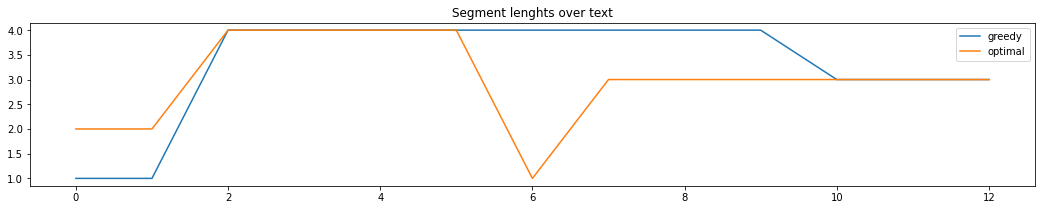

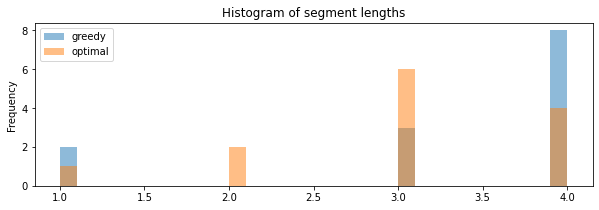

In [ ]:
greedy_segmentation = split_greedy(sentence_vectors, max_splits=len(optimal_segmentation.splits))
greedy_segmented_text = get_segments(sentenced_text, greedy_segmentation)
lengths_optimal = [len(segment) for segment in segmented_text for sentence in segment]
lengths_greedy = [len(segment) for segment in greedy_segmented_text for sentence in segment]
df = pd.DataFrame({'greedy':lengths_greedy, 'optimal': lengths_optimal})
df.plot.line(figsize=(18, 3), title='Segment lenghts over text')
df.plot.hist(bins=30, alpha=0.5, figsize=(10, 3), title='Histogram of segment lengths')

In [ ]:
lengths_greedy 

[1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3]

In [ ]:
lengths_optimal

[2, 2, 4, 4, 4, 4, 1, 3, 3, 3, 3, 3, 3]

In [ ]:
totals = [get_total(sentence_vectors, seg.splits, penalty) 
          for seg in [optimal_segmentation, greedy_segmentation]]
print('optimal score %4.2f, greedy score %4.2f' % tuple(totals))
print('ratio of scores %5.4f' % (totals[0] / totals[1]))

optimal score 65.73, greedy score 63.04
ratio of scores 1.0426


In [ ]:
greedy_segmentation

Segmentation(total=None, splits=[1, 2, 6, 10], gains=[6.068690734757796, 6.457183177635095, 7.953888775748155, 5.468016401432074], min_gain=5.468016401432074, optimal=None)

In [ ]:
greedy_segmented_text

[0    halo yayan terima kasih
 Name: stopwords, dtype: object,
 1    dasar riwayat keluh istri muntah muntah diare ...
 Name: stopwords, dtype: object,
 2    gejala muntah diare dasar rupa respon tubuh wa...
 3                    kondisi hitung obat khusus dokter
 4    pantau gejala muncul cair tubuh monitor tanda ...
 5                    anjur laku keluh hindar makan jam
 Name: stopwords, dtype: object,
 6    minum air sup minum elektrolit bantu cair tubu...
 7    makan makan makan tawar roti roti nasi bubur b...
 8                                            istirahat
 9    hindar susu produk susu kopi minum soda makan ...
 Name: stopwords, dtype: object,
 10    gejala muntah diare darah demam lemas langsung...
 11               moga informasi bantu moga lekas sembuh
 12                                                salam
 Name: stopwords, dtype: object]

In [ ]:
for i in range(0,len(greedy_segmented_text)):
  print('Segmentasi ke',i)
  for sentence in greedy_segmented_text[i]:
    print(sentence)
  print('')

Segmentasi ke 0
halo yayan terima kasih

Segmentasi ke 1
dasar riwayat keluh istri muntah muntah diare x kondisi alami istri salah racun makan infeksi salur cerna malapsorbsi intoleransi makan tanda gejala gejala

Segmentasi ke 2
gejala muntah diare dasar rupa respon tubuh wajar tubuh usaha toksin racun makan minum kontaminasi konsumsi
kondisi hitung obat khusus dokter
pantau gejala muncul cair tubuh monitor tanda tanda dehidrasi lemas mata cowong buang air jam urin warna pekat mulut kering haus tanda tanda bingung
anjur laku keluh hindar makan jam

Segmentasi ke 3
minum air sup minum elektrolit bantu cair tubuh istri
makan makan makan tawar roti roti nasi bubur biskuit
istirahat
hindar susu produk susu kopi minum soda makan asam pedas lemak

Segmentasi ke 4
gejala muntah diare darah demam lemas langsung hubung tugas fasilitas layan sehat moga informasi bantu moga lekas sembuh
moga informasi bantu moga lekas sembuh
salam



In [ ]:
# P_k
pk = P_k(optimal_segmentation.splits, greedy_segmentation.splits, len(sentence_vectors))
pk

0.0

# Textsplit Uji Cobaku dengan txt

In [ ]:
#UJI COBAKU
from textsplit.tools import SimpleSentenceTokenizer
sentence_tokenizer = SimpleSentenceTokenizer()

In [ ]:
#UJI COBAKU
segment_len = 3  # segment target length in sentences

vecr = CountVectorizer(vocabulary=wrdvecs.index)
sentenced_text = sentence_tokenizer(hasil)
sentence_vectors = vecr.transform(sentenced_text).dot(wrdvecs)
penalty = get_penalty([sentence_vectors], segment_len)
print('penalty %4.2f' % penalty)
optimal_segmentation = split_optimal(sentence_vectors, penalty, seg_limit=250)
segmented_text = get_segments(sentenced_text, optimal_segmentation)
print('%d sentences, %d segments, avg %4.2f sentences per segment' % (
    len(sentenced_text), len(segmented_text), len(sentenced_text) / len(segmented_text)))

ValueError: ignored

In [ ]:
#UJI COBAKU
sentenced_text

['Halo yayan, Terima kasih atas pertanyaannya. \n',
 'Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. \n',
 'Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. \n',
 'Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. \n',
 'Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan rasa sangat haus, dan adanya tanda - tanda  kebi

In [ ]:
#UJI COBAKU
segmented_text

[['Halo yayan, Terima kasih atas pertanyaannya. \n'],
 ['Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. \n',
  'Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. \n'],
 ['Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. \n'],
 ['Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan rasa sangat haus, dan adanya tanda - tan

In [ ]:
#UJI COBAKU
for i in range(0,len(segmented_text)):
  print('Segmentasi ke',i)
  for sentence in segmented_text[i]:
    print(sentence)
  print('')

Segmentasi ke 0
Halo yayan, Terima kasih atas pertanyaannya. 


Segmentasi ke 1
Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. 

Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. 


Segmentasi ke 2
Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. 


Segmentasi ke 3
Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan ras

In [ ]:
#UJI COBAKU
optimal_segmentation

Segmentation(total=234.89125168733088, splits=[1, 3, 4, 5, 9], gains=[10.283857914870424, 8.92543823345936, 7.823380180635873, 8.449316401306092, 26.778067671381706], min_gain=None, optimal=True)

optimal score 234.89, greedy score 234.89
ratio of scores 1.0000


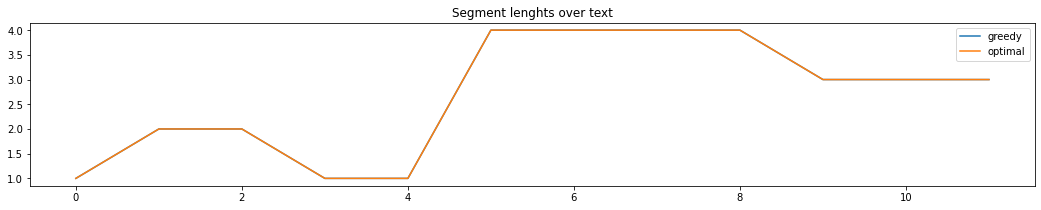

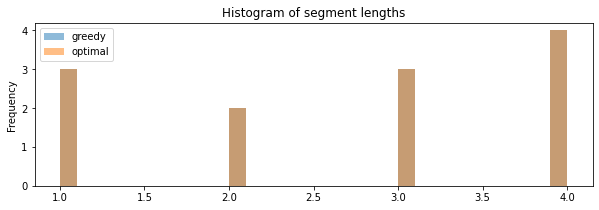

In [ ]:
#UJI COBAKU
greedy_segmentation = split_greedy(sentence_vectors, max_splits=len(optimal_segmentation.splits))
greedy_segmented_text = get_segments(sentenced_text, greedy_segmentation)
lengths_optimal = [len(segment) for segment in segmented_text for sentence in segment]
lengths_greedy = [len(segment) for segment in greedy_segmented_text for sentence in segment]
df = pd.DataFrame({'greedy':lengths_greedy, 'optimal': lengths_optimal})
df.plot.line(figsize=(18, 3), title='Segment lenghts over text')
df.plot.hist(bins=30, alpha=0.5, figsize=(10, 3), title='Histogram of segment lengths')

totals = [get_total(sentence_vectors, seg.splits, penalty) 
          for seg in [optimal_segmentation, greedy_segmentation]]
print('optimal score %4.2f, greedy score %4.2f' % tuple(totals))
print('ratio of scores %5.4f' % (totals[0] / totals[1]))

In [ ]:
#UJI COBAKU
greedy_segmentation

Segmentation(total=None, splits=[1, 3, 4, 5, 9], gains=[10.283857914870424, 8.92543823345936, 7.823380180635873, 8.449316401306092, 26.778067671381706], min_gain=5.134705666823066, optimal=None)

In [ ]:
#UJI COBAKU
greedy_segmented_text

[['Halo yayan, Terima kasih atas pertanyaannya. \n'],
 ['Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. \n',
  'Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. \n'],
 ['Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. \n'],
 ['Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan rasa sangat haus, dan adanya tanda - tan

In [ ]:
#UJI COBAKU
for i in range(0,len(greedy_segmented_text)):
  print('Segmentasi ke',i)
  for sentence in greedy_segmented_text[i]:
    print(sentence)
  print('')

Segmentasi ke 0
Halo yayan, Terima kasih atas pertanyaannya. 


Segmentasi ke 1
Berdasarkan riwayat keluhan istri Anda yang sudah Anda sampaikan, yaitu muntah - muntah dan diare lebih dari 5-10x,  terdapat kemungkinan kondisi yang dialami oleh istri Anda, salah satunya adalah keracunan makanan, infeksi saluran cerna, adanya malapsorbsi / intoleransi makanan yang ditandai dengan gejala - gejala yang Anda sebutkan tersebut. 

Gejala muntah dan diare pada dasarnya merupakan respon tubuh yang wajar sebagaimana tubuh berusaha mengeluarkan toksin / racun dari makanan / minuman yang terkontaminasi yang dikonsumsi sebelumnya. 


Segmentasi ke 2
Kondisi ini dapat membaik dengan sendirinya dalam hitungan beberapa hari tanpa perlu pengobatan khusus dari dokter. 


Segmentasi ke 3
Pantau terus gejala yang muncul, kembalikan cairan tubuh yang keluar, dan monitor tanda - tanda  dehidrasi seperti lemas, mata cowong, tidak buang air kecil lebih dari 6 jam atau urin berwarna pekat, mulut kering dan ras

In [ ]:
#UJI COBAKU 
#P_k
pk = P_k(optimal_segmentation.splits, greedy_segmentation.splits, len(sentence))
pk

0.0

# TextTiling

In [ ]:
import string
import nltk
import numpy as np
from nltk.stem.porter import *
from nltk.corpus import stopwords
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.metrics import windowdiff

In [ ]:
#Function to plot graphs required for Text Tiling Algorithm
def plot_fig(x,score,heading,fig_no):
    fig = plt.figure(fig_no,figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(x,score,label=heading)
    ax.legend()

In [ ]:
#Sen_length represents the desired sentence length that we are focusing on 
#Doc represents the corpus of text
#Fig no represents the figure no that we want to give to the graph
def text_tiling(doc,sen_len,fig_no):
    
    #Porter Stemming and removing stop words
    sentences=[]
    sentence=""
    j=0
    for word in doc.split(" "):
      j=j+1
      sentence=sentence + word +' '
      if j==sen_len:
        sentences.append(sentence[:-1])
        sentence=""
        j=0
    #If the last sentence is of length less than sen_length
    sentences.append(sentence[:-1])
 
    #Vectorizing Sentences using Sklearn to determine Cosine Similarity between adjacent sentences
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    score=[]
    for i in range(0,tfidf_matrix.shape[0]-2):
        score.append(cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[i+1:i+2])[0][0])
    
    #Plotting Cosine Similarity 
    plot_fig(range(1,tfidf_matrix.shape[0]-1),score,'Lexical Similarity with Sentence Length '+ str(sen_len),fig_no)
    
    #Implementing Windowdiff measure
    mean_score=np.mean(score)
    std_score=np.std(score)
    #Threshold is defined as Mean Score - Standard Deviation
    threshold=mean_score-std_score
    boundary=[]
    for i in range(0,len(score)-2): 
        #score[0] represents the cosine similarity between sentence 1 and sentence 2, score[1] between 2 and 3 and score[2] between 3 and 4
        #If depth is greater than threshold, then there will be a dissimilariy between sentence 2 and sentence 3, so we are marking sentence 2 as the boundary
        depth=score[i]-score[i+1]+score[i+2]-score[i+1]
        if depth>=threshold:
            boundary.append(i+1) #Storing positions of Sentences that represent a boundary
    #Replacing boundaries with 1 and words with 0
    boundary_string=''
    for i in range(0,len(sentences)):
        boundary_string=boundary_string+sentences[i]+' '
        if i in boundary:
            boundary_string=boundary_string+' $$ '  
        
    return boundary_string

In [ ]:
def window_diff(ref_word,doc,sen_len,fig_no):
    #Call to TextTiling Function
    hypo=text_tiling(doc,sen_len,fig_no)
    #Splitting Hypothesis Words
    hypo_words=[word for word in hypo.split(' ')]
    #Storing supervised input
    para_words=ref_word
    i=0
    j=0
    hypo_string=''
    para_string=''
    # What this loop does can be explained by an example: Suppose we have total of 3 words and 
    # we have boundaries after two words in hypothesis  (hey man $$ yep) and after one word in training( hey $$ man yep)
    # so this would represent hypothesis string as 00010(0(hey)0($$ in reference)0(man)1($$ in hypothesis)0(yep)) 
    # reference string as 01000 (0(hey)1($$ in ref)0(man)0($$ in hypothesis)0(yep))
    while i<len(hypo_words) and j<len(para_words):
        if hypo_words[i]==para_words[j]:
            hypo_string=hypo_string+'0'
            para_string=para_string+'0'
            i=i+1
            j=j+1
        elif hypo_words[i]=='$$':
            hypo_string=hypo_string+'1'
            para_string=para_string+'0'
            i=i+1
        elif para_words[j]=='$$':
            hypo_string=hypo_string+'0'
            para_string=para_string+'1'
            j=j+1
    
    #Small windows produce more negatives, thus WindowDiff recommends using a window size (k) of half the average segment length.
    #Referred from this paper: Getting More from Segmentation Evaluation
    
    k=sen_len/2
    return ('%.2f' % windowdiff(hypo_string,para_string,k))

In [ ]:
doc = ''
for sentence in dataset['stopwords']:
  doc += sentence + ''

KeyError: ignored

In [ ]:
doc_copy=doc
ref_word=[]
for word in doc_copy.split(" "):
  ref_word.append(word)

In [ ]:
for i in range(10,100,10):
  text_tiling(doc,i,i/10)

In [ ]:
window_diff_score=[]
for i in range(10,100,10):
    window_diff_score.append(window_diff(ref_word,doc,i,i/10))
#plot_fig(range(10,110,10),window_diff_score,'Windowdiff Score variation with Change in Sentence Length')